# NEURONによる神経シミュレーション

PCにPythonをインストールして行ことも出来ますが、設定が煩雑であるため難しいです。

そこで、GoogleColabを使用すればGoogleアカウントがあれば遠隔でまた無料で使用可能です。12時間まで連続使用来ます。

順番に Shift + Enter を押していくだけで、シミュレーションが可能です。

参考資料

１．NEURONのPythonチュートリアル https://neuron.yale.edu/neuron/docs/scripting-neuron-basics 

２．井本研究室のホームページ https://www.nips.ac.jp/huinfo/documents/index.htm 

３．NEURON+Pythonによるはじめての神経細胞シミュレーション　https://qiita.com/DaisukeMiyamoto/items/69821c254cebc3de2879

## NEURONパッケージのインストール

In [ ]:
!pip install neuron

これで、GoogleColab上でNEURONが使えるようになりました。(制限時間12時間)

次からは、デモを行います。
まずは井本研究室のホームページから https://www.nips.ac.jp/huinfo/documents/index.htm



## デモ　パッチクランプ法のシミュレーション

In [ ]:
from neuron import h
import neuron
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 神経細胞の設定
soma = h.Section()
soma.diam = 30.0 # 細胞の直径(micron)
soma.L = 30.0 # 細胞の長さ(micron)
soma.insert('hh')  # ホジキン・ハックスレーモデルに切り替え

# Current Campの設定
ic = h.IClamp(0.5, sec=soma) # Current Clampを設定。0.5はsomaにおける位置
ic.delay = 20.0   # 開始時間(ms)
ic.dur   = 100.0  # 持続時間(ms)
ic.amp   = 0.6     # 固定電流(nA)

# 微分方程式の数値計算の設定
cvode = h.CVode()
cvode.active(1)
cvode.atol(1.0e-5)     

1e-05

In [ ]:
# 記録変数の設定
vv = h.Vector()      # membrane potential vector
tv = h.Vector()      # time stamp vector
cv = h.Vector()      # current size
vv.record(soma(0.5)._ref_v) # 0.5はsomaにおける位置
tv.record(h._ref_t)
cv.record(ic._ref_i)

Vector[42]

In [ ]:
# シミュレーション実行
tstop = 200.0 # 総時間(ms)
v_init = -65.0 # 初期の膜電位(mV)
h.finitialize(v_init)
h.fcurrent()
neuron.run(tstop)

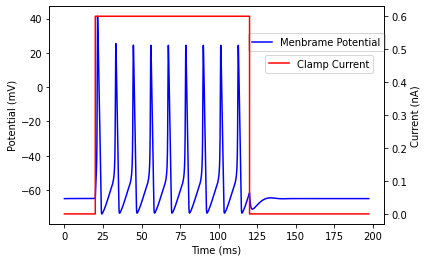

In [ ]:
# プロット作成
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(tv.as_numpy(), vv.as_numpy(), color="blue", label= "Menbrame Potential")
ax1.set_ylabel('Potential (mV)')
ax2.plot(tv.as_numpy(), cv.as_numpy(), color="red", label= "Clamp Current")
ax2.set_ylabel('Current (nA)')
ax1.legend(bbox_to_anchor=(0.58, 0.9))
ax2.legend(bbox_to_anchor=(0.63, 0.8))
ax1.set_xlabel('Time (ms)')
plt.show()